<a href="https://colab.research.google.com/github/WillianOliveiraDS/Data_Science/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*by [Willian Oliveira](https://bit.ly/3igfbCH)*
  

# Analisando a Violência no Rio de Janeiro

<center><img alt="Rio de Janeiro" width="40%" src="https://raw.githubusercontent.com/WillianOliveiraDS/Imagenss/master/Rio.png"></center>

O Rio de Janeiro é a segunda maior cidade do país em numero populacional, com aproximadamente 6.5 milhões de habitantes, mas não é só nesse ranking que a cidade está entre as primeiras, segundo o site R7 ela também está entre as vinte cidades mais violentas do país. A metrópole, é o principal destino de turistas estrangeiros. Por isso, funciona como uma espécie de "vitrine" do país para o mundo.

Com a tecnologia em constante avanço, os orgão públicos se conscientizaram da importancia da divulgação dos seus dados de diversos setores, e um desses setores é o da segurança pública, e neste projeto trabalharemos esses dados com intuito termos bases estatísticas da criminalidade no Rio de Janeiro.



## Obtenção dos Dados

Os dados foram obtidos diretamento do portal [ISPDados](http://www.ispdados.rj.gov.br/estatistica.html), que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.



## Importando os dados


In [10]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Importando Dados
VIOLENCIA_RIO = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv"
df = pd.read_csv(VIOLENCIA_RIO)

### Visualizando o DataSet

* Aqui iremos visualizar a quantidade de `"linhas e colunas"` que existem,   utilizando (`.shape`) que retorna uma tupla representando a dimensionalidade do DataSet.

In [ ]:
# Visualizando o tamanho do DF
print("Variáveis: ",df.shape[1])
print("Entradas: ",df.shape[0])

* Extraindo e imprimindo os nomes das colunas utilizando a função (`.columns`) que retorna todos os nomes das colunas do DataSet

In [ ]:
# Visualizando o nome das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

* Monstrando quais os tipos de variáveis estão contidas no dataset, utilizando (`.dtype`) que retorna uma serie com o tipo de dados de cada coluna.

* Aqui é interessante notar que todas as variáveis presentes no dataset são do tipo numérico, sejam elas `int` ou `float`.



In [ ]:
# Quais os tipos das variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

* Para entendermos como está "a cara" dos nossos dados vamos vizualizar as entradas utilizando a função (`.head()`). Esta função retorna as primeiras linhas para o objeto com base na posição, não passando nenhum parâmetro dentro dos **( )** ele nos retorna as 5 primerias entradas. É útil para testar rapidamente se o seu objeto possui o tipo certo de dados.

In [ ]:
# Monstrando as 5 primeiras linhas do DataSet
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


É interessante reparar que algumas variáveis apresentam muitos dados ausentes. Dado o grande intervalo de tempo apresentado no  de **`1991/2019`**, podemos sugerir algumas hipóteses que poderiam explicar essa ausência, e como podemos contorná-la para continuar explorando o conjunto de dados.

* Como temos dados registrados desde o ano de 1991, alguns desses crimes poderiam não estar sendo contabilizados pelo órgão que coletou esses dados e gerou esse dataset. Estarem ausentes não significa que não existiram, e vamos pensar em formas de lidar com essa ausência logo mais.

* Infelizmente, se tratando de Brasil, se hoje temos uma cultura de dados que ainda deixa a desejar, o que dizer da mesma no período em tela? Devemos levar em consideração também o formato em que esses dados eram registrados na época. Será que foram registrados corretamente e perdidos em períodos de digitalização? Ou será que o gerenciamento dessas informações sempre foi falho?

Antes de decidirmos o que fazer em relação aos dados ausentes, vamos verificar a proporção deles em relação à totalidade do dataset.

* Para identificarmos qual a porcentagem de valores ausentes no DataSet utilizaremos a função (`.isnull`) que detecta valores ausentes e retorna um objeto booleano do tipo `True` e `False`. E usaremos também a função (`.sum`) que soma todas os valores dentro de cada grupo, usaremos o (`.shape[0]`) para pegar todas as "linhas" do DataSet e fazer o calculo de porcentagem de valores nulos e a função (`.sort_values`) com o parâmetro (`ascending=False`) para classificar os o resultado em ordem decrescente.

In [64]:
# Mostrando a porcentagem dos valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

## Informações Estatísticas da Violência no Rio de Janeiro



* Mostraremos um resumo estatístico do seu DataSet será usada o método (`.describe`). Este método gera estatísticas descritivas.
Estatísticas descritivas incluem aquelas que resumem a tendência central, dispersão e forma da distribuição de um conjunto de dados, excluindo valores **NaN**.

Utilizando esse método, temos informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.

In [61]:
# Mostrando as estatísticas do DS
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Crimes Contra o Património - Veículos (Série histórica 1991 à 2019)

* Para visualizar as médias de determinadas variáveis, será usado a função (`mean`) que pega a soma de todos os valores e divide pela quantidade de entradas.

Os resultados obtidos na análise nos mostram que foram roubados em média 2448 veículos por mês, já os furtos de veículos que são aqueles onde o criminoso não ameaça ou usa a violência contra a pessoa proprietária do veículo subtraido teve uma média menor segundo os dados, cerca de 1674 veículos. Em contrapartida temos um número ainda que pequeno em relação ao total, porém, satisfatório para cerca para os donos dos veículos, que são a média de veículos recuperadosque está em torno de 1772 veículos que totalizam quase a metade em números do total de veículos roubados e furtados.

In [59]:
# Mostrando médias das variáveis "roubo_veiculo" 
mean_roubo_veiculo = df.roubo_veiculo.mean()
print("A média de roubo_veiculos é de:",'\t',"{:.2f}".format(mean_roubo_veiculo))
# Mostrando médias das variáveis "furto_veiculo"
mean_furto_veiculo = df.furto_veiculos.mean()
print("A média de furto_veiculos é de:",'\t',"{:.2f}".format(mean_furto_veiculo))
# Mostrando médias das variáveis "recuperacao_veiculos"
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()
print("A média de recuperacao_veiculos é de:",'\t',"{:.2f}".format(mean_recuperacao_veiculos))

A média de roubo_veiculos é de: 	 2448.70
A média de furto_veiculos é de: 	 1674.67
A média de recuperacao_veiculos é de: 	 1772.24


* Para a visualizar a porcentagem da média de veículos recuperados, é usado a regra de operação $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$ usando as `series` de cada variável que queremos fazer o cálculo.

Os resultados obtidos desta análise apontam um total de 4123 véiculos produtos de roubo e furto e deste total, foram recuperados 1772 veiculos em média confirmando a efetividade média de 42.98% na recuperação de veículos.

In [60]:
# Ver a média da variável recuperacao_veiculo
mean_recuperacao_veiculo = df.recuperacao_veiculos.mean()
print("Teve uma média de {:.2f} de veículos recuperados".format(mean_recuperacao_veiculo))

# Total de veículos perdidos
total = mean_furto_veiculo + mean_roubo_veiculo
print("Segundo os dados, teve um total de {:.2f} veículos perdidos entre roubos e furtos".format(total))

# Porcentagem de veículos recuperados
porcen = mean_recuperacao_veiculo / total*100
print("Dados apontam que {:.2f} % dos veículos foram recuperados".format(porcen))

Teve uma média de 1772.24 de veículos recuperados
Segundo os dados, teve um total de 4123.37 veículos perdidos entre roubos e furtos
Dados apontam que 42.98 % dos veículos foram recuperados


### Crimes Contra a Vida (Série histórica 1991 à 2019)

* Abaixo, vamos identificar qual foi o máximo e o mínimo de registros de homicídios dolosos no período.

Para isso, usaremos os atributos `max` e `min` para identificar na variável `hom_doloso` qual foi o seu maior e menor número de registro.

In [56]:
# Máxima histórica registrada.
max_hom_doloso = df.hom_doloso.max()
print("O número máximo de homicídios dolosos registrados foram {} no periodo mensal desde 1991".format(max_hom_doloso))

# Mínima histórica regsitrada.
min_hom_doloso = df.hom_doloso.min()
print("O número mínimo de registros no mesmo período foi de {} homicídios dolosos".format(min_hom_doloso))


O número máximo de homicídios dolosos registrados foram 831 no periodo mensal desde 1991
O número mínimo de registros no mesmo período foi de 272 homicídios dolosos


In [55]:
# Encontrar no DataSet a máxima histórica.
mmax = df.loc[(df.hom_doloso == 831)]
mmax

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


In [54]:
# Encontrar no DataSet a mínima histórica.
mmin = df.loc[(df.hom_doloso == 272)]
mmin

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


Com a análise acima conseguimos encontrar a máxima histórica de 831 homicídios dolosos que ocorreu em Janeiro de 1995 e a mínima de 272 que ocorreu em Junho de 2015.

## Criando e explorando DataSet de 2018 e 2019

* Para uma análise mais direcionada, foi criado um novo DataSet contendo apenas os crimes que ocorreram no ano de 2018 e 2019.

Para isso foi usado o metodo `.loc[]` com uma condiçao para a localização das respectivas "partes" do dataset original. 

In [53]:
# Criar um novo dataset para analisarmos anos específicos 2018 e 2019
# DataSet do periodo completo de 2018
df_2018 = df.loc[(df.vano == 2018)]
df_2018


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
324,2018,1,468,6.0,23,157.0,607,5575,409.0,164.0,2093.0,596,108,5286,977,7810,1070,3,10.0,2044.0,4.0,68.0,17.0,2935,20928,1264,2263,675.0,1425.0,139.0,7420,13186,0.0,123.0,12.0,2815.0,1793,626.0,1024.0,175.0,3695,2788.0,567.0,1000.0,149.0,4834.0,453.0,44,1.0,5.0,1.0,654,10924,5286,67683.0,3
325,2018,2,441,5.0,21,102.0,494,5087,446.0,129.0,1793.0,552,113,4792,742,7268,1011,1,5.0,2154.0,1.0,65.0,4.0,2976,19684,1159,2327,548.0,1578.0,116.0,6691,12419,0.0,107.0,12.0,2137.0,1588,572.0,913.0,132.0,3292,2505.0,503.0,1206.0,151.0,4261.0,334.0,41,0.0,2.0,0.0,569,10433,4792,61383.0,3
326,2018,3,508,6.0,20,109.0,553,5473,452.0,171.0,2308.0,638,115,5358,918,7638,1385,2,5.0,2183.0,9.0,52.0,8.0,2729,21040,1249,1623,743.0,1224.0,150.0,6557,11546,0.0,136.0,4.0,2654.0,1744,673.0,950.0,152.0,3450,2795.0,577.0,1347.0,109.0,4962.0,428.0,33,1.0,4.0,0.0,643,11206,5358,66035.0,3
327,2018,4,476,2.0,14,101.0,491,5299,428.0,176.0,2410.0,665,104,4656,892,7596,1352,1,5.0,2101.0,8.0,67.0,13.0,2517,19977,1346,1596,748.0,1146.0,149.0,6522,11507,0.0,101.0,17.0,2659.0,1857,718.0,992.0,172.0,3444,2937.0,581.0,1297.0,147.0,4706.0,370.0,26,0.0,1.0,0.0,593,11049,4656,64527.0,3
328,2018,5,423,2.0,13,145.0,535,5157,452.0,158.0,2354.0,631,105,4382,752,8034,1501,2,7.0,2294.0,7.0,94.0,14.0,2783,20606,1361,1610,783.0,1173.0,181.0,7008,12116,0.0,145.0,7.0,3159.0,1966,691.0,1119.0,184.0,3148,3071.0,582.0,1430.0,210.0,4669.0,373.0,45,5.0,3.0,0.0,583,11829,4382,66922.0,3
329,2018,6,375,6.0,11,155.0,571,4983,440.0,195.0,2175.0,525,111,4014,755,7735,1346,1,7.0,2247.0,4.0,80.0,16.0,2654,19495,1278,1467,690.0,1229.0,156.0,6401,11221,0.0,133.0,11.0,2885.0,1809,610.0,1066.0,167.0,2422,2911.0,578.0,1268.0,228.0,4423.0,413.0,30,2.0,1.0,1.0,547,11328,4014,62142.0,3
330,2018,7,410,6.0,9,130.0,546,5223,419.0,153.0,2361.0,503,94,3518,731,7488,1312,1,1.0,2196.0,6.0,58.0,12.0,2321,18241,1294,1653,649.0,1366.0,137.0,6580,11679,2.0,127.0,8.0,3226.0,1880,662.0,1082.0,170.0,2478,2741.0,607.0,1387.0,190.0,4587.0,387.0,26,6.0,3.0,1.0,555,10996,3518,62689.0,3
331,2018,8,360,6.0,13,176.0,535,4655,433.0,157.0,2267.0,535,109,3910,673,7261,1400,2,2.0,2170.0,4.0,62.0,12.0,2620,18760,1398,1553,733.0,1302.0,162.0,6944,12092,0.0,149.0,12.0,3615.0,1994,694.0,1141.0,201.0,3368,3050.0,587.0,1727.0,260.0,4532.0,377.0,24,4.0,2.0,0.0,555,10831,3910,65797.0,3
332,2018,9,382,7.0,14,108.0,509,5344,489.0,157.0,2504.0,463,103,4053,578,6756,1275,1,1.0,2182.0,9.0,160.0,16.0,2385,17982,1339,1419,655.0,1173.0,161.0,6686,11433,0.0,146.0,5.0,2809.0,1959,747.0,1062.0,183.0,2625,2798.0,470.0,1633.0,190.0,4666.0,386.0,17,1.0,4.0,0.0,511,10213,4053,62376.0,3
333,2018,10,383,2.0,11,127.0,491,5472,488.0,153.0,2382.0,454,95,4242,651,7360,1441,1,8.0,2477.0,9.0,83.0,18.0,2308,19147,1428,1597,735.0,1368.0,206.0,7036,12370,0.0,143.0,8.0,2959.0,1735,666.0,939.0,165.0,3176,2727.0,515.0,1105.0,171.0,4877.0,427.0,16,2.0,1.0,1.0,523,11278,4242,65589.0,3


In [52]:
# DataSet do período registrado em 2019 contendo apenas os 8 primeiros meses
df_2019 = df.loc[(df.vano == 2019)]
df_2019

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
336,2019,1,386,2.0,15,159.0,577,6423,459.0,157.0,2334.0,431,116,3785,740,7454,1328,2,7.0,2414.0,6.0,88.0,19.0,2365,18755,1415,2058,720.0,1581.0,168.0,7992,13934,0.0,129.0,6.0,3125.0,2021,792.0,1077.0,201.0,2810,2915.0,540.0,1266.0,236.0,5902.0,447.0,31,4.0,2.0,0.0,562,11196,3785,69609.0,3
337,2019,2,323,5.0,8,145.0,450,5210,440.0,157.0,2045.0,411,116,3554,645,7000,1356,4,1.0,2111.0,14.0,60.0,14.0,2124,17410,1344,1889,685.0,1613.0,158.0,7315,13004,0.0,144.0,7.0,3089.0,2090,798.0,1126.0,202.0,2556,3072.0,559.0,1392.0,235.0,4904.0,351.0,37,4.0,4.0,0.0,481,10467,3554,64967.0,3
338,2019,3,344,5.0,11,132.0,590,5902,469.0,160.0,2157.0,497,95,3775,638,7734,1532,1,4.0,2626.0,5.0,88.0,16.0,2547,19558,1364,2757,634.0,1889.0,202.0,8549,15395,0.0,159.0,6.0,3004.0,1941,740.0,1053.0,181.0,2470,3026.0,618.0,1392.0,306.0,5571.0,407.0,29,2.0,2.0,0.0,492,11892,3775,72100.0,3
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


* Como o Ano de 2019 contem apenas 8 meses de registro foi preciso adotar a medida de criar outra parte deste dataset contendo somente os 6 primeiros meses de cada ano, para não haver distorção nos resultados da análise.

In [51]:
# Separando o período do primeiro semestre dos DataSet
# Criando df_ps2018 referente ao primeiro semestre de 2018
df_ps2018 = df_2018.iloc[:6]
df_ps2018

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
324,2018,1,468,6.0,23,157.0,607,5575,409.0,164.0,2093.0,596,108,5286,977,7810,1070,3,10.0,2044.0,4.0,68.0,17.0,2935,20928,1264,2263,675.0,1425.0,139.0,7420,13186,0.0,123.0,12.0,2815.0,1793,626.0,1024.0,175.0,3695,2788.0,567.0,1000.0,149.0,4834.0,453.0,44,1.0,5.0,1.0,654,10924,5286,67683.0,3
325,2018,2,441,5.0,21,102.0,494,5087,446.0,129.0,1793.0,552,113,4792,742,7268,1011,1,5.0,2154.0,1.0,65.0,4.0,2976,19684,1159,2327,548.0,1578.0,116.0,6691,12419,0.0,107.0,12.0,2137.0,1588,572.0,913.0,132.0,3292,2505.0,503.0,1206.0,151.0,4261.0,334.0,41,0.0,2.0,0.0,569,10433,4792,61383.0,3
326,2018,3,508,6.0,20,109.0,553,5473,452.0,171.0,2308.0,638,115,5358,918,7638,1385,2,5.0,2183.0,9.0,52.0,8.0,2729,21040,1249,1623,743.0,1224.0,150.0,6557,11546,0.0,136.0,4.0,2654.0,1744,673.0,950.0,152.0,3450,2795.0,577.0,1347.0,109.0,4962.0,428.0,33,1.0,4.0,0.0,643,11206,5358,66035.0,3
327,2018,4,476,2.0,14,101.0,491,5299,428.0,176.0,2410.0,665,104,4656,892,7596,1352,1,5.0,2101.0,8.0,67.0,13.0,2517,19977,1346,1596,748.0,1146.0,149.0,6522,11507,0.0,101.0,17.0,2659.0,1857,718.0,992.0,172.0,3444,2937.0,581.0,1297.0,147.0,4706.0,370.0,26,0.0,1.0,0.0,593,11049,4656,64527.0,3
328,2018,5,423,2.0,13,145.0,535,5157,452.0,158.0,2354.0,631,105,4382,752,8034,1501,2,7.0,2294.0,7.0,94.0,14.0,2783,20606,1361,1610,783.0,1173.0,181.0,7008,12116,0.0,145.0,7.0,3159.0,1966,691.0,1119.0,184.0,3148,3071.0,582.0,1430.0,210.0,4669.0,373.0,45,5.0,3.0,0.0,583,11829,4382,66922.0,3
329,2018,6,375,6.0,11,155.0,571,4983,440.0,195.0,2175.0,525,111,4014,755,7735,1346,1,7.0,2247.0,4.0,80.0,16.0,2654,19495,1278,1467,690.0,1229.0,156.0,6401,11221,0.0,133.0,11.0,2885.0,1809,610.0,1066.0,167.0,2422,2911.0,578.0,1268.0,228.0,4423.0,413.0,30,2.0,1.0,1.0,547,11328,4014,62142.0,3


In [50]:
# Criando df_ps2019 referente ao primeiro semestre de 2019
df_ps2019 = df_2019.iloc[:6]
df_ps2019

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
336,2019,1,386,2.0,15,159.0,577,6423,459.0,157.0,2334.0,431,116,3785,740,7454,1328,2,7.0,2414.0,6.0,88.0,19.0,2365,18755,1415,2058,720.0,1581.0,168.0,7992,13934,0.0,129.0,6.0,3125.0,2021,792.0,1077.0,201.0,2810,2915.0,540.0,1266.0,236.0,5902.0,447.0,31,4.0,2.0,0.0,562,11196,3785,69609.0,3
337,2019,2,323,5.0,8,145.0,450,5210,440.0,157.0,2045.0,411,116,3554,645,7000,1356,4,1.0,2111.0,14.0,60.0,14.0,2124,17410,1344,1889,685.0,1613.0,158.0,7315,13004,0.0,144.0,7.0,3089.0,2090,798.0,1126.0,202.0,2556,3072.0,559.0,1392.0,235.0,4904.0,351.0,37,4.0,4.0,0.0,481,10467,3554,64967.0,3
338,2019,3,344,5.0,11,132.0,590,5902,469.0,160.0,2157.0,497,95,3775,638,7734,1532,1,4.0,2626.0,5.0,88.0,16.0,2547,19558,1364,2757,634.0,1889.0,202.0,8549,15395,0.0,159.0,6.0,3004.0,1941,740.0,1053.0,181.0,2470,3026.0,618.0,1392.0,306.0,5571.0,407.0,29,2.0,2.0,0.0,492,11892,3775,72100.0,3
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3


### Crimes contra a vida 2018 e 2019

#### Homicídios dolosos

Nesta etapa, foi realizada uma análise estatística dos homicídios dolosos ocorridos no primeiro semestra dos anos de 2018 e 2019, com isso conseguimos comprovar estatísticamente uma reduçao dos homicídios desta categoria de um ano para o outro, sendos computados 2691 homicídios dolodos em 2018, já no ano de 2019 tivemos uma reduçao para 2090 casos, sendo 22.33% menor que o ano anterior, dando indícios de que possa estar ocorrendo uma melhor efetividade da segurança pública.

In [49]:
# Calculo do total de homicício doloso do primeiro semestre de 2018 e 2019
hom2018 = df_ps2018.hom_doloso.sum()
hom2019 = df_ps2019.hom_doloso.sum()
print('No primeiro semestre do ano de 2018 tivemos um total de {} homicídios dolosos já no mesmo período de 2019 tivemos um total de {}. '.format(hom2018, hom2019))

# Calculo da redução de homicício doloso por porcentagem 
porc_homicidio = (hom2018 - hom2019) / hom2018*100
print('No ano de 2019 tivemos uma redução de {:.2f}% nos casos de homicídios dolosos.'.format(porc_homicidio))


No primeiro semestre do ano de 2018 tivemos um total de 2691 homicídios dolosos já no mesmo período de 2019 tivemos um total de 2090. 
No ano de 2019 tivemos uma redução de 22.33% nos casos de homicídios dolosos.


* O método `.plot` cria um gráfico de linhas. Podemos ver que os meses ficaram na parte horizontal do gráfico, isto é, no eixo X. Enquanto os valores ficaram na parte vertical do gráfico, ou seja, no eixo Y.

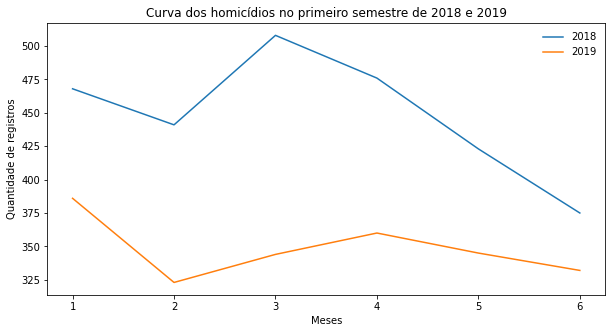

In [48]:
fig, gr = plt.subplots(figsize=(10,5))
gr.plot(df_ps2018['mes'], df_ps2018['hom_doloso'], label='2018')
gr.plot(df_ps2019['mes'], df_ps2019['hom_doloso'], label='2019')
plt.grid(False);
plt.ylabel('Quantidade de registros')
plt.xlabel('Meses')
plt.title('Curva dos homicídios no primeiro semestre de 2018 e 2019');
plt.legend(frameon=False);

In [47]:
# Variação na quantidade de crimes entre os meses com maiores ocorrências
df_ps2018.loc[(df_ps2018.mes == 2)]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
325,2018,2,441,5.0,21,102.0,494,5087,446.0,129.0,1793.0,552,113,4792,742,7268,1011,1,5.0,2154.0,1.0,65.0,4.0,2976,19684,1159,2327,548.0,1578.0,116.0,6691,12419,0.0,107.0,12.0,2137.0,1588,572.0,913.0,132.0,3292,2505.0,503.0,1206.0,151.0,4261.0,334.0,41,0.0,2.0,0.0,569,10433,4792,61383.0,3


In [ ]:
df_ps2018.loc[(df_ps2018.mes == 3)]

In [46]:
pormes_2018 = (508-441)/441*100
print('Aumento de {:.2f} %'.format(pormes_2018))

Aumento de 15.19 %


In [43]:
df_ps2019.loc[(df_ps2019.mes == 2)]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
337,2019,2,323,5.0,8,145.0,450,5210,440.0,157.0,2045.0,411,116,3554,645,7000,1356,4,1.0,2111.0,14.0,60.0,14.0,2124,17410,1344,1889,685.0,1613.0,158.0,7315,13004,0.0,144.0,7.0,3089.0,2090,798.0,1126.0,202.0,2556,3072.0,559.0,1392.0,235.0,4904.0,351.0,37,4.0,4.0,0.0,481,10467,3554,64967.0,3


In [44]:
df_ps2019.loc[(df_ps2019.mes == 3)]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
338,2019,3,344,5.0,11,132.0,590,5902,469.0,160.0,2157.0,497,95,3775,638,7734,1532,1,4.0,2626.0,5.0,88.0,16.0,2547,19558,1364,2757,634.0,1889.0,202.0,8549,15395,0.0,159.0,6.0,3004.0,1941,740.0,1053.0,181.0,2470,3026.0,618.0,1392.0,306.0,5571.0,407.0,29,2.0,2.0,0.0,492,11892,3775,72100.0,3


In [45]:
pormes_2019 = (344-323)/323*100
print('Aumento de {:.2f} % '.format(pormes_2019))

Aumento de 6.50 % 


Com o gráfico, podemos ver de uma forma mais clara como foi a curva de homicídios em cada mês do primeiro semestre. Fica claro que entre o mês de fevereiro e março de 2018 houve uma acentuação nos registros de crimes cometidos chegando a ter um aumento de 15.19% entre um mês e outro, já no mesmo período de 2019 houve um aumento de 6.5%.  

#### Crimes violentos letais intencionais

* Os crimes Violentos intencionais incluem homicídio doloso, roubo seguido de morte (latrocínio) e lesão corporal seguida de morte.

In [ ]:
# Gerando a base para calculo de todas as categorias de crimes

# Latrocínio
latr2018 = df_ps2018.latrocinio.sum()
latr2019 = df_ps2019.latrocinio.sum()

# Homicídio doloso já foram criadas as variáveis anteriormente
hom2018 = df_ps2018.hom_doloso.sum()
hom2019 = df_ps2019.hom_doloso.sum()

# Lesão corporal seguida de morte
les2018 = df_ps2018.lesao_corp_morte.sum()
les2019 = df_ps2019.lesao_corp_morte.sum()

# Soma dos crimes violentos letais intencionais 2018
cvli_2018 = (latr2018 + hom2018 + les2018)

# Soma dos crimes violentos letais intencionais 2019
cvli_2019 = (latr2019 + hom2019 + les2019)
print('No ano de 2018 foram registrados nos seis primeiros meses um total de {} crimes letais intencionais, já no ano de 2019 foram registrados {}.'.format(cvli_2018, cvli_2019))

# Calculo da redução em porcentagem dos crimes
porcen_cvli = (cvli_2018 - cvli_2019) / cvli_2018*100
print('Entre 2018 e 2019 houve uma redução de {:.2f} % no registro de crimes letais intencionais.'.format(porcen_cvli))

No ano de 2018 foram registrados nos seis primeiros meses um total de 2820.0 crimes letais intencionais, já no ano de 2019 foram registrados 2176.0.
Entre 2018 e 2019 houve uma redução de 22.84 % no registro de crimes letais intencionais.


### Crime contra o patrimônio 2018 e 2019

In [41]:
# Calculo do total de roubos de veículos do primeiro semestre de 2018 e 2019
rou2018 = df_ps2018.roubo_veiculo.sum()
rou2019 = df_ps2019.roubo_veiculo.sum()
print('No primeiro semestre do ano de 2018 tivemos um total de {} roubos de veículos já no mesmo período de 2019 tivemos um total de {}. '.format(rou2018, rou2019))

# Calculo da redução de roubos de veículos por porcentagem 
porc_roubo = (rou2018 - rou2019) / rou2018*100
print('No ano de 2019 tivemos uma redução de {:.2f}% roubos de veículos.'.format(porc_roubo))

No primeiro semestre do ano de 2018 tivemos um total de 28488 roubos de veículos já no mesmo período de 2019 tivemos um total de 21633. 
No ano de 2019 tivemos uma redução de 24.06% roubos de veículos.


In [42]:
# Calculo do total de roubo de cargas do primeiro semestre de 2018 e 2019
carga2018 = df_ps2018.roubo_carga.sum()
carga2019 = df_ps2019.roubo_carga.sum()
print('No primeiro semestre do ano de 2018 tivemos um total de {} roubos a cargas já no mesmo período de 2019 tivemos um total de {}. '.format(carga2018, carga2019))

# Calculo da redução de roubo de cargas por porcentagem 
porc_carga = (carga2018 - carga2019) / carga2018*100
print('No ano de 2019 tivemos uma redução de {:.2f}% nos roubos de cargas.'.format(porc_carga))

No primeiro semestre do ano de 2018 tivemos um total de 5036 roubos a cargas já no mesmo período de 2019 tivemos um total de 3999. 
No ano de 2019 tivemos uma redução de 20.59% nos roubos de cargas.


## Conclusão

Ao longo deste projeto, foram realizadas análises dos números de crimes cometidos no Estado do Rio de Janeiro no período entre 1991 e 2019 e um comparativo das estatísticas dps crimes no período entre 2018 e 2019. O projeto foi dividido em etapas:

* Busca dos dados no site ISPDados.
* Vizualização e limpeza dos dados.
* Análise dos crimes contra a vida e o patrimônio
* Criação de um novo dataset 2018 e 2019

A lição aprendida neste projeto foi a necessidade de se ter perguntas a serem respondidas, quanto mais perguntas precisarem de respostas, mais trabalhará o seu dataset e mais aprofundamento terá as análises, também podemos aprender a importância de um trabalho dedicado na hora de entender, visualizar a "cara" e limpar seus dados, que por vezes se tratando de dados governamentais onde se tem uma tremenda deficiência no quesito organização e conclusão de trabalhos.

Com isso, conseguimos tirar algumas conclusões estatísticas, são elas:

* O estado se tornou mais eficiênte no combate ao crime, mesmo ainda tendo uma taxa altíssima.
* Um achatamento na curva dos homicídios dolosos de 2018 para 2019.
* Já se completa 25 anos desde o píco histórico de homicídios dolosos registrado num único mês.
